# import necessery library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('loan_prediction')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


dataset has 614 rows and 13 columns

In [4]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# checking for null values

In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

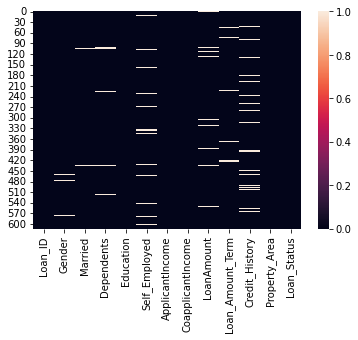

In [6]:
sns.heatmap(loan.isnull())

dataset has missing values

In [7]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)

In [8]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(),inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mean(),inplace=True)

In [9]:
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)

<AxesSubplot:>

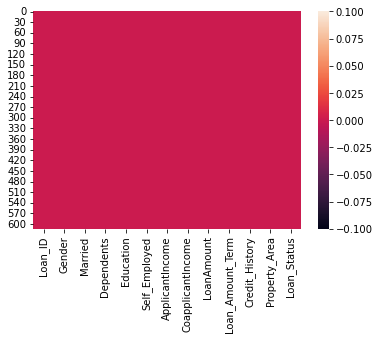

In [10]:
sns.heatmap(loan.isnull())

In [11]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# checking for correlation

In [12]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<AxesSubplot:>

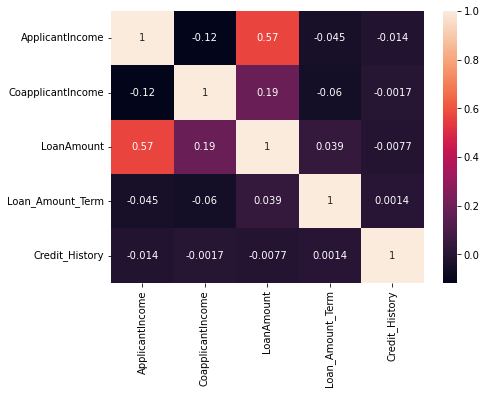

In [13]:
plt.figure(figsize=(7,5))
sns.heatmap(loan.corr(),annot=True)

ApplicantIncome         AxesSubplot(0.125,0.125;0.133621x0.755)
CoapplicantIncome    AxesSubplot(0.285345,0.125;0.133621x0.755)
LoanAmount            AxesSubplot(0.44569,0.125;0.133621x0.755)
Loan_Amount_Term     AxesSubplot(0.606034,0.125;0.133621x0.755)
Credit_History       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

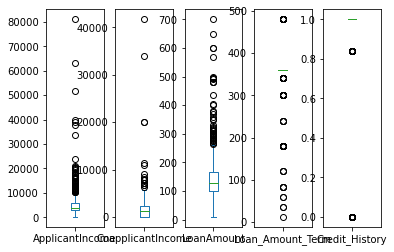

In [14]:
loan.plot(subplots=True,kind='box')

<AxesSubplot:>

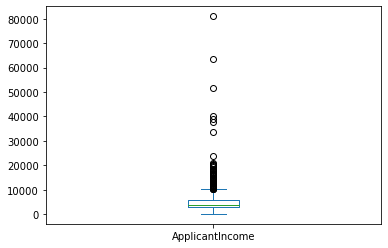

In [15]:
loan['ApplicantIncome'].plot.box()

<AxesSubplot:>

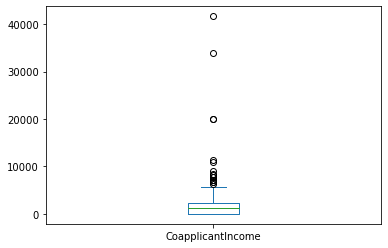

In [16]:
loan['CoapplicantIncome'].plot.box()

<AxesSubplot:>

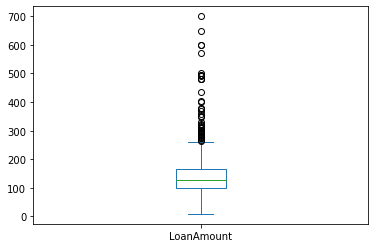

In [17]:
loan['LoanAmount'].plot.box()

# checking for skewness

In [18]:
loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

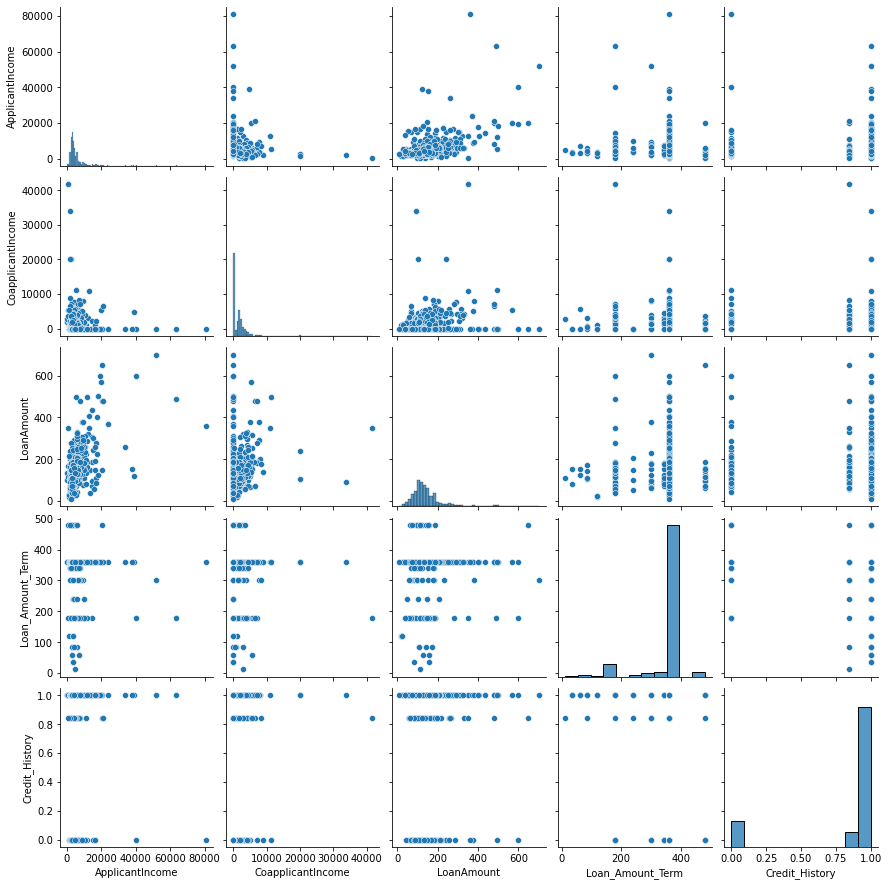

In [19]:
sns.pairplot(loan)

In [20]:
loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
loan['Gender']=le.fit_transform(loan['Gender'])
loan['Married']=le.fit_transform(loan['Married'])
loan['Education']=le.fit_transform(loan['Education'])
loan['Self_Employed']=le.fit_transform(loan['Self_Employed'])
loan['Property_Area']=le.fit_transform(loan['Property_Area'])
loan['Loan_Status']=le.fit_transform(loan['Loan_Status'])
loan['Dependents']=le.fit_transform(loan['Dependents'])

# tranforming data to remove skewness

In [23]:
loan=loan.drop(['Loan_ID'],axis=1)

In [24]:
x=loan.drop(['Loan_Status'],axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [25]:
y=loan['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [26]:
from sklearn.preprocessing import power_transform

In [27]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.47234264, -1.37208932, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263, -1.35000343],
       [ 0.47234264,  0.72881553, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       ...,
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  1.31670248, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [-2.11710719, -1.37208932, -0.82710431, ...,  0.18590509,
        -2.2471956 ,  0.00236103]])

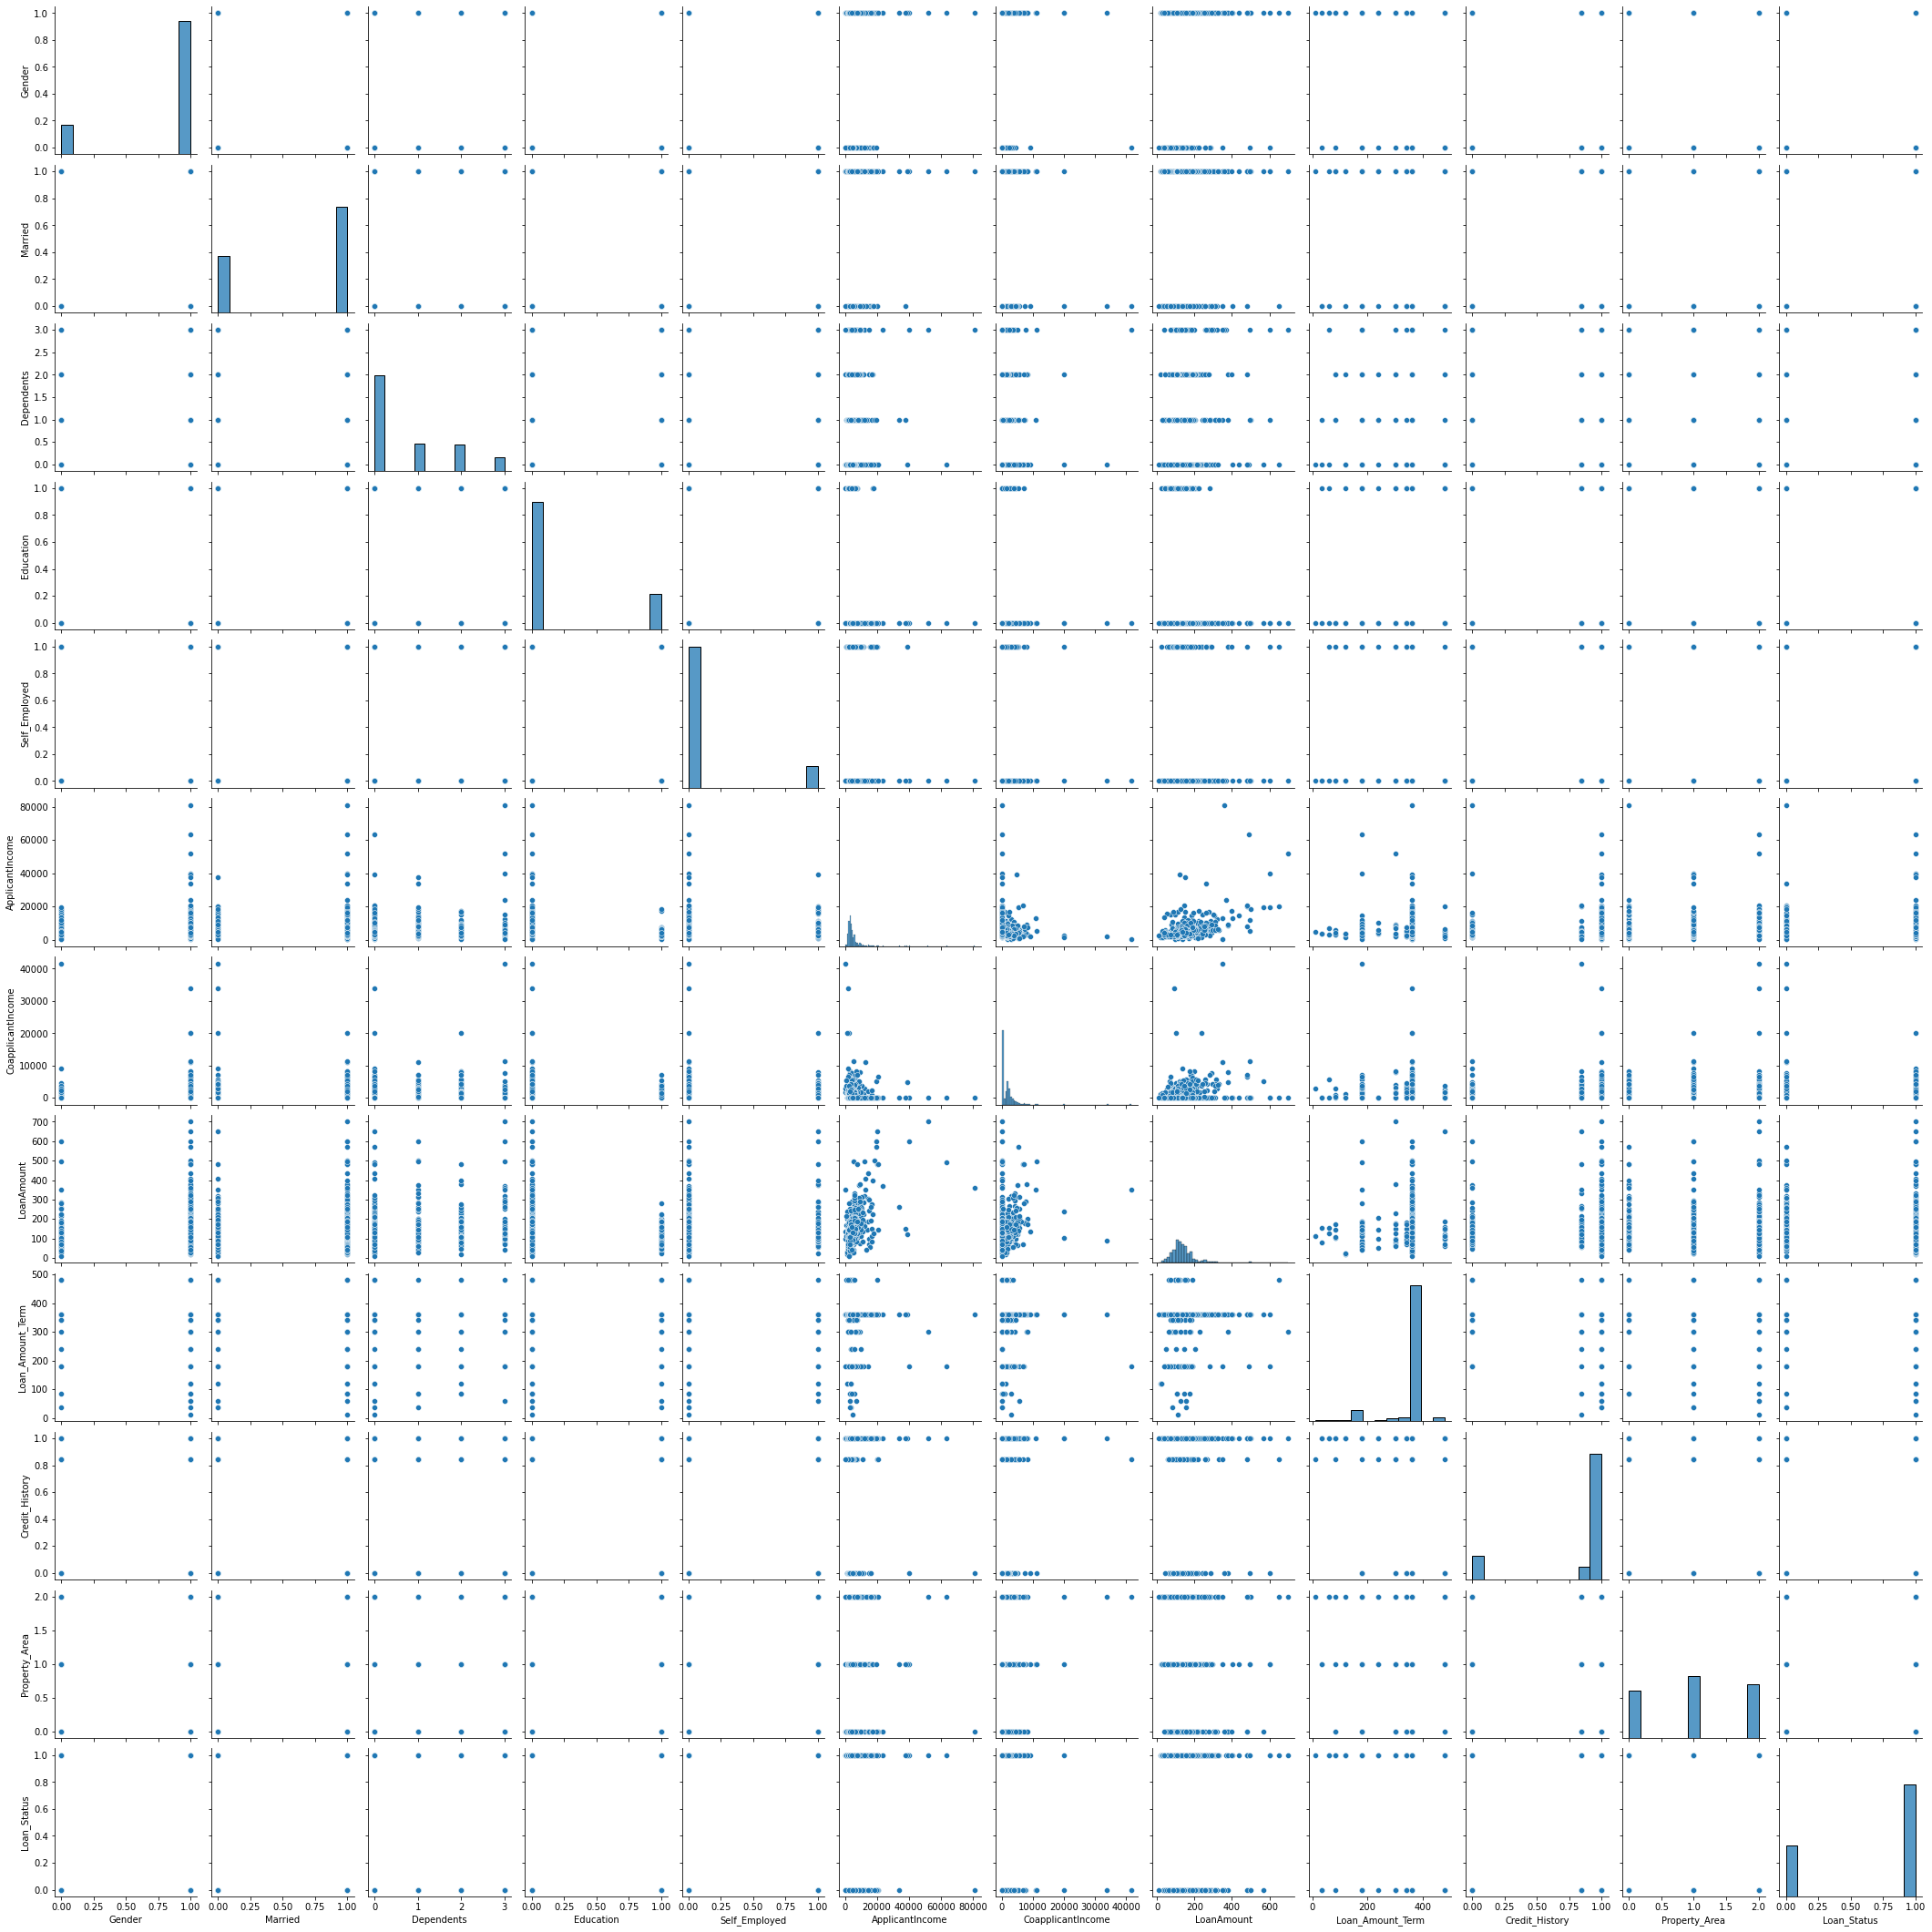

In [28]:
sns.pairplot(loan)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [30]:
sc.fit_transform(x)
x

array([[ 0.47234264, -1.37208932, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263, -1.35000343],
       [ 0.47234264,  0.72881553, -0.82710431, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       ...,
       [ 0.47234264,  0.72881553,  0.85425912, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [ 0.47234264,  0.72881553,  1.31670248, ...,  0.18590509,
         0.51406263,  1.1935668 ],
       [-2.11710719, -1.37208932, -0.82710431, ...,  0.18590509,
        -2.2471956 ,  0.00236103]])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

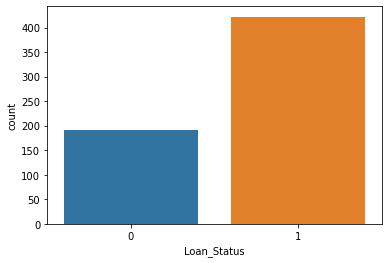

In [31]:
sns.countplot(loan['Loan_Status'])

dataset is imbalance

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote=SMOTE()
x,y=smote.fit_resample(x,y)
print(x.shape,y.shape)

(844, 11) (844,)


In [34]:
y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

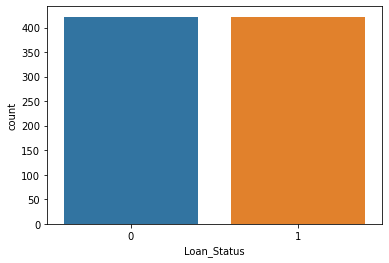

In [35]:
sns.countplot(y)

dataset is balanced now

# spliting the dataset

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [38]:
print(y.shape, y_train.shape, y_test.shape)

(844,) (590,) (254,)


# model building

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
lr=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [41]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7007874015748031
[[ 70  50]
 [ 26 108]]
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       120
           1       0.68      0.81      0.74       134

    accuracy                           0.70       254
   macro avg       0.71      0.69      0.69       254
weighted avg       0.71      0.70      0.70       254



In [42]:
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7559055118110236
[[96 24]
 [38 96]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       120
           1       0.80      0.72      0.76       134

    accuracy                           0.76       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.76      0.76      0.76       254



In [43]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7322834645669292
[[ 79  41]
 [ 27 107]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       120
           1       0.72      0.80      0.76       134

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254



In [44]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7125984251968503
[[95 25]
 [48 86]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       120
           1       0.77      0.64      0.70       134

    accuracy                           0.71       254
   macro avg       0.72      0.72      0.71       254
weighted avg       0.72      0.71      0.71       254



In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [46]:
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ab=AdaBoostClassifier()

In [47]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8149606299212598
[[ 96  24]
 [ 23 111]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       120
           1       0.82      0.83      0.83       134

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254



In [48]:
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.7755905511811023
[[ 92  28]
 [ 29 105]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       120
           1       0.79      0.78      0.79       134

    accuracy                           0.78       254
   macro avg       0.77      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254



In [49]:
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.7519685039370079
[[ 88  32]
 [ 31 103]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       120
           1       0.76      0.77      0.77       134

    accuracy                           0.75       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.75      0.75      0.75       254



# cross validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
for i in range(2,9):
    cv=cross_val_score(gb,x,y,cv=i)
    print(gb,cv.mean())

GradientBoostingClassifier() 0.7274881516587678
GradientBoostingClassifier() 0.7666725557995339
GradientBoostingClassifier() 0.768957345971564
GradientBoostingClassifier() 0.7785150746689209
GradientBoostingClassifier() 0.7868456602499156
GradientBoostingClassifier() 0.7940869736324282
GradientBoostingClassifier() 0.7989330637915544


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
param_alpha={'alpha':[.0001,.001,.01,.1,]}

In [53]:
rd=Ridge()

In [54]:
gd=GridSearchCV(estimator=rd,param_grid=param_alpha)

In [55]:
gd.fit(x,y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [56]:
gd.best_params_

{'alpha': 0.0001}

In [57]:
gd.best_score_

0.0781920365854816

In [58]:
pred=rf.predict(x_test)
print('predicted Loan_Status:',pred)
print('actual Loan_Status',y_test)

predicted Loan_Status: [1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1
 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
actual Loan_Status 378    0
454    1
121    1
501    1
155    1
      ..
266    1
115    1
143    1
382    1
290    1
Name: Loan_Status, Length: 254, dtype: int32


In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared erroe:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 0.18503937007874016
Mean squared erroe: 0.18503937007874016
Root Mean Squared Error: 0.4301620277043758
